In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('classic')
from sklearn.decomposition import PCA
from cond_color import get_colors, plot_start, plot_end

In [48]:
np.random.seed(42)

Loading Data

In [49]:
data = np.load('psths.npz')
X, times = data['X'], data['times']

# Exercise 1: Plotting raw PSTHs

In [50]:
def plot_psths(X, times, n_rows, n_cols, n_cond):
    np.random.seed(42)
    cond = np.random.randint(low=X.shape[1], size=n_cond)

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,10))

    for row in ax:
        for col in row:
            n = np.random.randint(low=X.shape[0], size=1)[0]

            for c in cond:
                col.plot(times, X[n, c,:], label = 'C = '+str(c))
                col.set_title(f'Neuron {n}')
                col.legend()
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Time relative to onset of hand movement')
    plt.ylabel('Trial-averaged spike rate (Hz)')

    plt.show()
    return

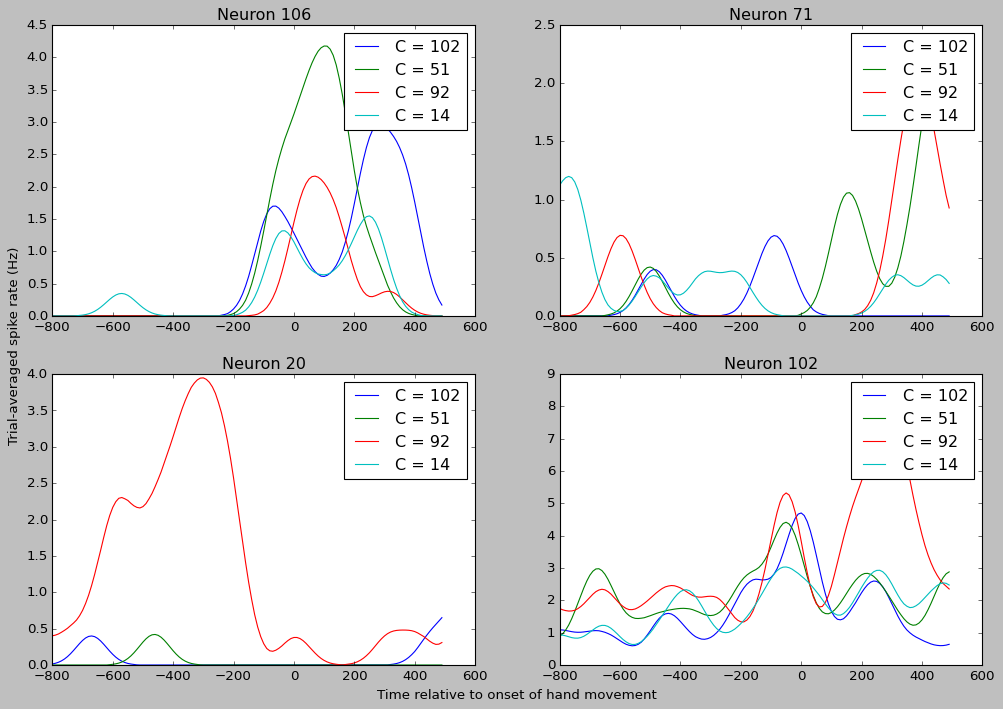

In [51]:
plot_psths(X, times, 2, 2, 4)

# Exercise 2: Pre-processing

## Normalisation

In [52]:
a, b = X.max(axis=(1,2)), X.min(axis=(1,2))
a, b = a.reshape(182,1,1), b.reshape(182,1,1)

X_norm = (X - b) / (a - b + 5 )

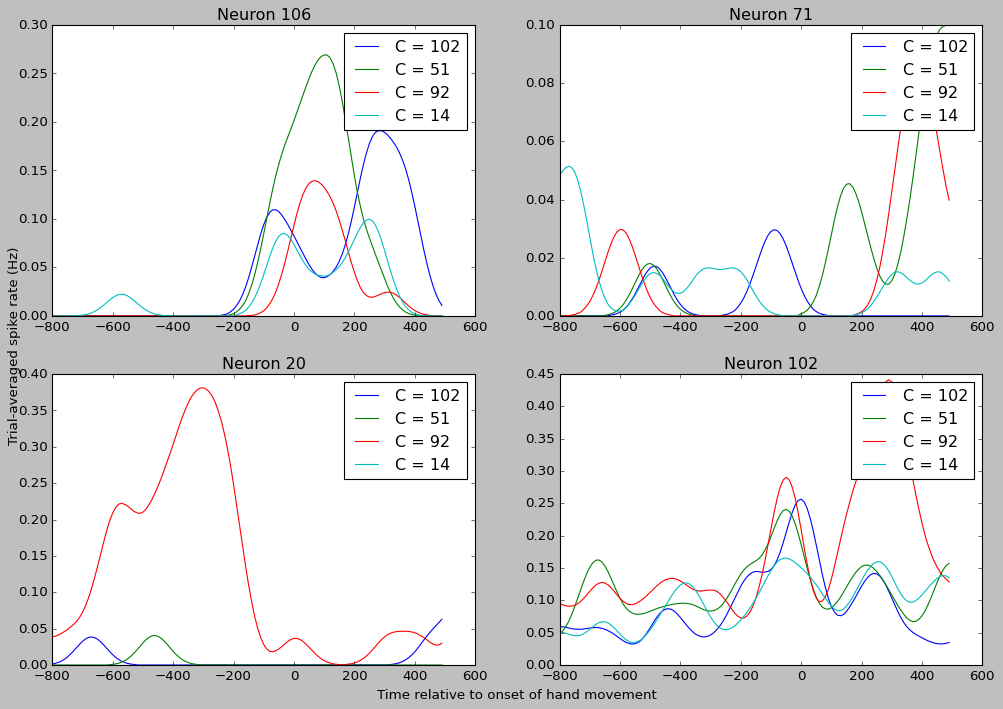

In [53]:
plot_psths(X_norm, times, 2, 2, 4)

## Mean centering

In [54]:
mean = X_norm.mean(axis=(0,2))
print(mean.shape)
mean = mean.reshape(1, 108, 1)
X_norm_mean = X_norm - mean

(108,)


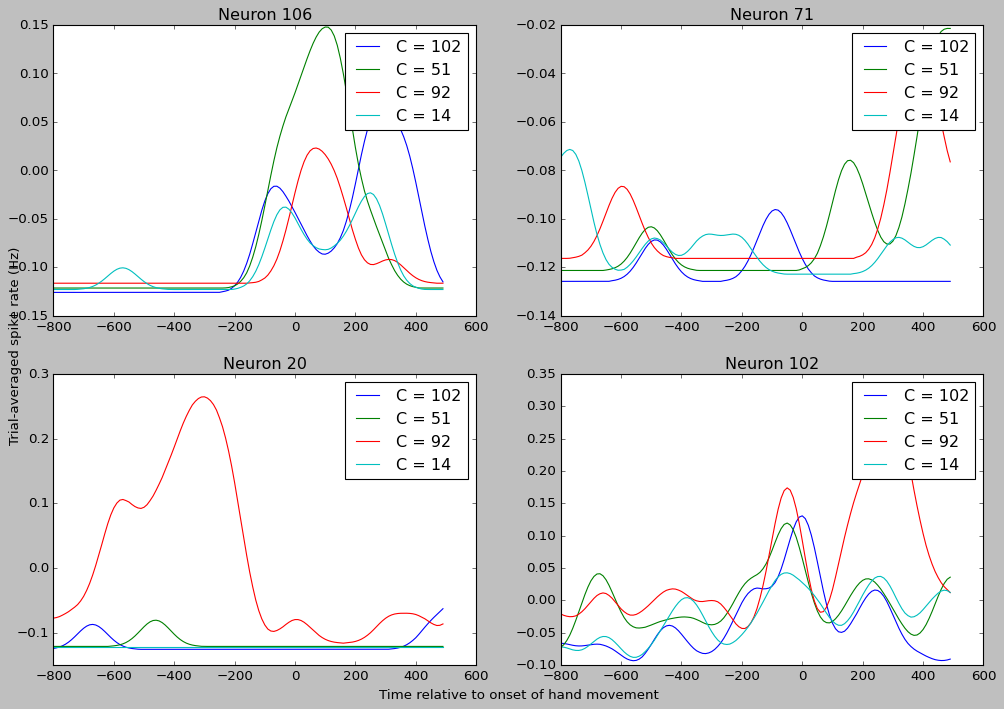

In [55]:
plot_psths(X_norm_mean, times, 2, 2, 4)

## Dimensionality reduction by PCA

In [56]:
times = times[65:111]

In [57]:
X_trunc = X_norm_mean[:,:,65:111]
X = X_trunc.reshape(X_trunc.shape[0], X_trunc.shape[1]*X_trunc.shape[2])
print(X.shape)

(182, 4968)


In [58]:
pca = PCA(n_components=12)
pca.fit(X.T)
Z = pca.transform(X.T).T
print(Z.shape)

(12, 4968)


# Plotting PC space trajectorie

In [59]:
Z = Z.reshape(12, X_trunc.shape[1], X_trunc.shape[2])

In [60]:
def plot_PCA_psths(X, PCA_axis_1, PCA_axis_2):
    np.random.seed(42)
    PCA_axis_1 -= 1
    PCA_axis_2 -= 1

    colors = get_colors(X[PCA_axis_1, :, -1], X[PCA_axis_2, :, -1], False)
    for cond in range(0, X.shape[1]):
        plt.plot(X[PCA_axis_1, cond, :], X[PCA_axis_2, cond, :], label = 'C = '+str(cond), color=colors[cond])
        plt.title(f'PCA plot')
        plt.xlabel(f'PCA - {PCA_axis_1 + 1}')
        plt.ylabel(f'PCA - {PCA_axis_2 + 1}')
        plot_start(X[PCA_axis_1, :, 0], X[PCA_axis_2, :, 0], colors, markersize=50, ax=None)
        plot_end(X[PCA_axis_1, :, -1], X[PCA_axis_2, :, -1], colors, markersize=50, ax=None)

    plt.show()
    return

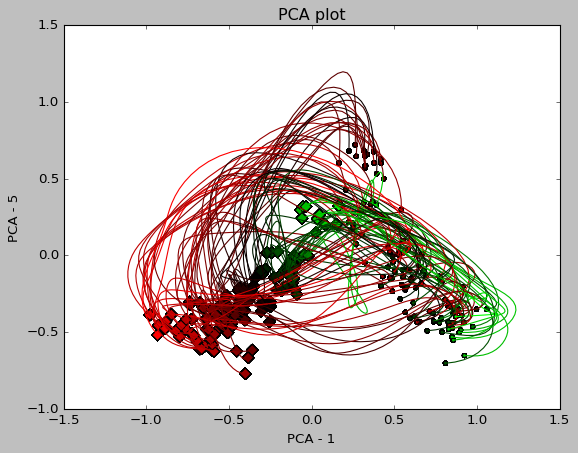

In [61]:
plot_PCA_psths(Z, 1, 5)